In [1]:
%load_ext autoreload

In [16]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
MODULE_PATH = os.path.join(BASE_PATH, "modules")
DATASET_PATH = os.path.join(BASE_PATH, "datasets")

In [5]:
sys.path.append(MODULE_PATH)

In [49]:
from data import BenchmarkData, DataSetType
from bayesian import McDropout
from models import ygal_cnn, fchollet_cnn, setup_growth
from active_learning import AcquisitionFunction

In [24]:
mnist_path = os.path.join(DATASET_PATH, "mnist")
num_classes = 10
mnist = BenchmarkData(DataSetType.MNIST, mnist_path, dtype=float, classes=num_classes)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(mnist.inputs, mnist.targets)

In [26]:
setup_growth()

1 Physical GPU's,  1 Logical GPU's


In [33]:
model = McDropout(fchollet_cnn(output=num_classes))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")

In [34]:
model.fit(x_train, y_train)

1641/1641 [==============================] - 5s 3ms/step - loss: 0.4667


In [36]:
model.evaluate(x_test, y_test, sample_size=1, batch_size=900)

{'loss': 0.17565235, 'accuracy': 0.9504}

In [39]:
model.evaluate(x_test, y_test, sample_size=100, batch_size=900)

{'loss': 0.09830082, 'accuracy': 0.9503868571428571}

In [98]:
result = model(x_test[:10], sample_size=100)

In [196]:
o_model = fchollet_cnn(output=num_classes)
o_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
o_model.fit(x_test[:10], y_test[:10], epochs=5, batch_size=10)

Epoch 1/5
1/1 [==============================] - 0s 951us/step - loss: 51.6130 - accuracy: 0.1000
Epoch 2/5
1/1 [==============================] - 0s 652us/step - loss: 52.5133 - accuracy: 0.2000
Epoch 3/5
1/1 [==============================] - 0s 1ms/step - loss: 23.5123 - accuracy: 0.2000
Epoch 4/5
1/1 [==============================] - 0s 854us/step - loss: 42.2076 - accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 999us/step - loss: 13.8342 - accuracy: 0.6000


In [197]:
def predict(data, model, num_predictions):
    
    predictions = []
    
    for n in range(num_predictions):
        output = model(data, training=True)
        predictions.append(output)
        
    return np.stack(predictions, axis=1)

In [314]:
num_samples = 100
outputs = predict(x_test[10:20], o_model, num_samples)

In [315]:
classes = list(range(num_classes))*num_samples

<AxesSubplot:xlabel='labels', ylabel='prediction'>

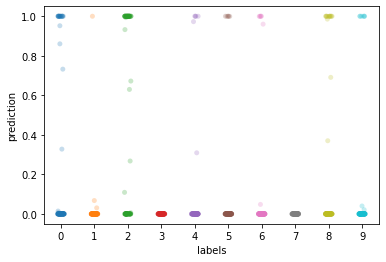

In [319]:
df = pd.DataFrame({
    "prediction": outputs[1].flatten(),
    "labels": classes
})
sns.stripplot(data=df, y="prediction", x="labels", alpha=.25)

In [323]:
pred = np.argmax(np.mean(outputs, axis=1), axis=1)
pred

array([2, 2, 0, 2, 2, 2, 8, 2, 2, 6])

In [324]:
y_test[10:20]

array([1, 5, 5, 9, 3, 2, 1, 2, 2, 6], dtype=uint8)

In [325]:
np.mean(pred == y_test[10:20])

0.4

In [332]:
o_model.fit(x_test[:10], y_test[:10], epochs=50, batch_size=10)

Epoch 1/50
1/1 [==============================] - 0s 1ms/step - loss: 26.1159 - accuracy: 0.4000
Epoch 2/50
1/1 [==============================] - 0s 1ms/step - loss: 21.5079 - accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 1ms/step - loss: 30.7761 - accuracy: 0.6000
Epoch 4/50
1/1 [==============================] - 0s 1ms/step - loss: 10.0781 - accuracy: 0.7000
Epoch 5/50
1/1 [==============================] - 0s 1ms/step - loss: 3.5514 - accuracy: 0.8000
Epoch 6/50
1/1 [==============================] - 0s 1ms/step - loss: 4.4494 - accuracy: 0.8000
Epoch 7/50
1/1 [==============================] - 0s 1ms/step - loss: 0.6508 - accuracy: 0.9000
Epoch 8/50
1/1 [==============================] - 0s 916us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 9/50
1/1 [==============================] - 0s 977us/step - loss: 0.0569 - accuracy: 1.0000
Epoch 10/50
1/1 [==============================] - 0s 1ms/step - loss: 2.0016 - accuracy: 0.9000
Epoch 11/50
1/1 [==============

<AxesSubplot:xlabel='labels', ylabel='prediction'>

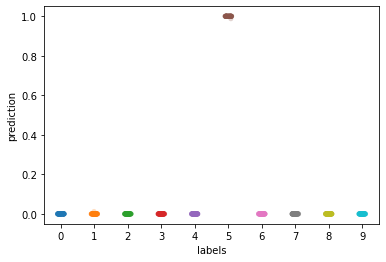

In [356]:
outputs = predict(x_test[10:20], o_model, num_samples)
classes = list(range(num_classes))*num_samples
df = pd.DataFrame({
    "prediction": outputs[1].flatten(),
    "labels": classes
})
sns.stripplot(data=df, y="prediction", x="labels", alpha=.25)

In [353]:
classes = list(range(num_classes))
df = pd.DataFrame({
    "prediction": np.mean(outputs, axis=1)[0],
    "labels": classes
})
